

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  **This data set contains** information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>  **Certain columns** like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
>  **The final two columns ending
with “_adj” **show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over
time.

### Question(s) for Analysis
>  **Which genres are most popular fromyear to year?**

>  **What kinds of properties are associated with  movies that have high revenues?**

In [102]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline

In [103]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.**

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [104]:
# Loading dataset  
df=pd.read_csv('tmdb-movies.csv')

In [105]:
# print out a few lines.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [106]:
# check for the number of rows and columns
df.shape

(10866, 21)

dataset composed of 10866 rows and 21 columns

In [107]:
# check for information like missing datain the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

there are some missing values present in our dataset we will see if it will affect the analysis of data as we will delete some columns in the cleaning step so we will waiting till the cleaning step to see if we will delete the missing value or not.

In [108]:
# check for some statistical values for our dataset:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **we found some statistical data as we run the function 'describe' 
one of them the mean runtime of the movies was about 103 minutes  and most of the movies runtime between 90 minutes to 111 minutes.
as we see other data about the budget of films and the revenue which will help us in our analysis.**
for budjet_adj and revenue_adj there are 0  numbers we will deal with them in cleaning section.

>**We need to know the pure income of movies so we need to add a column which contain the differance between the budget and revenue for each movies in our list**

In [109]:
# insert profit column to see the pure income of movies
df.insert(2, 'profit', df['revenue'] - df['budget'])

# ### Data Cleaning

 

In [110]:
#removing some unnecessary columns from dataset
df=df.drop(columns=['imdb_id','homepage','tagline', 'keywords'])

In [111]:
# Find out if there are any duplicate rows
df.duplicated().sum()

1

In [112]:
# Remove the duplicated rows
df.drop_duplicates(inplace=True)

In [113]:
df.duplicated().sum()

0

In [114]:
# remove Null values from columns
df = df.dropna(subset=['genres','cast', 'director', 'production_companies'], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 18 columns):
id                      9772 non-null int64
profit                  9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
overview                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(7), object(7)
memory usage: 1.4+ MB


In [115]:
#removing rows where revenue_adj and budget_adj is equal to zero
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [116]:
df.describe()

,id,profit,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,7.136540e+07,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.513764e+08,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,-4.139124e+08,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,-1.173477e+06,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,2.047434e+07,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,8.347333e+07,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,2.544506e+09,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [117]:
#converting release date into datetime
df.release_date = pd.to_datetime(df.release_date)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 18 columns):
id                      3805 non-null int64
profit                  3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
overview                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(6)
memory usage: 564.

>**Summary of data wrangling** 
> after gathering the data from our dataset we explore the first few rows to know it's general properties. after that we move deeper in thr dataset showing it's dimension , some of it's statistica; properities like mean of variables. then we clean our data by changing some of the columns titles and removed the unnecessary columnsfrom our dataset. 
we removed the nan values and removed the duplicated row .
,we add a column for the pure income of each movie we think it will help in our analysis, we convert the release date column to datetime so we can make analysis based on months only.we will extract data from cast and production companies in our exploration of data.
So, now our data ready for the next step of investigation.

<a id='eda'></a>
## Exploratory Data Analysis

> **we've trimmed and cleaned your data, now we are ready to move on to exploration.**


### General look for data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef657a7518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fef64838588>]], dtype=object)

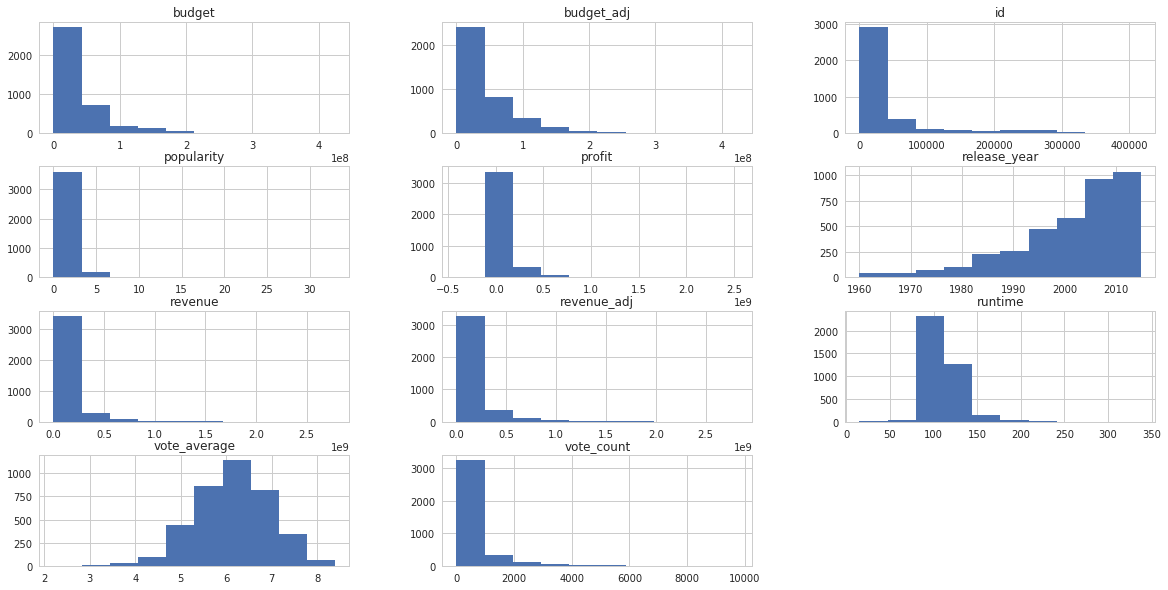

In [119]:
df.hist(figsize=(20, 10))

from the histogram above we can found that
>runtime of most movies about 120 minutes
>the percent of Movies increased in the last years when compared to 60's till 80's years

# Who is the most popular actor in our list of movies?

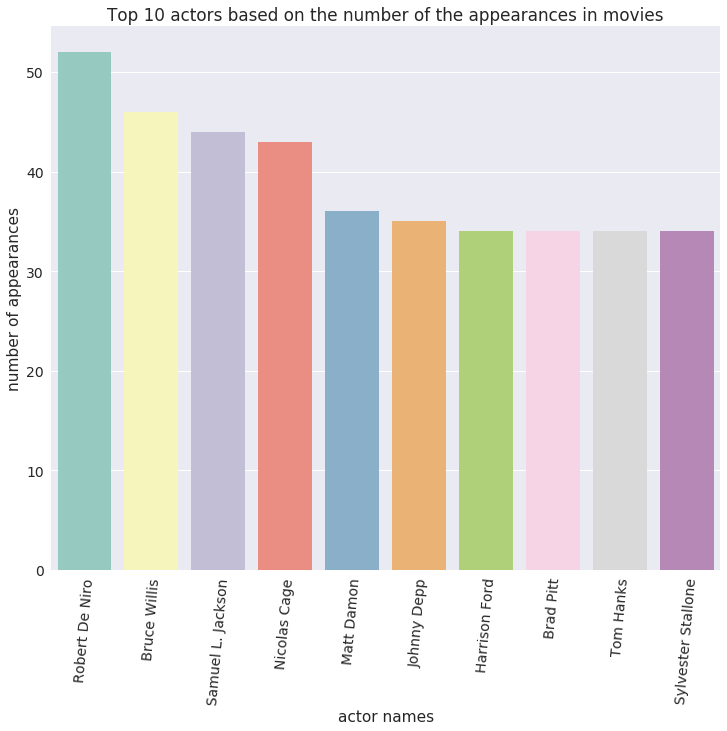

In [120]:
#Creating a dict for the cast, and how many times each actor casted for movies
dict= {}
actors = np.array(df["cast"].str.split("|"))
for actorList in actors:
    for actor in actorList:
        actor = actor.lstrip() 
        if actor not in dict:
            dict[actor] = 1
        else:
            dict[actor] += 1
                
sorted_actor_dict = sorted(dict.items(), key = operator.itemgetter(1), reverse = True)

x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:10]:
    x_axis.append(item[0])
    y_axis.append(item[1])

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")

for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 10 actors based on the number of the appearances in movies')
plt.show()

we obseve that Robert De Niro is the most popular actor in our list he play about 45 role in different films.

# What is the average runtime of movies and does it changes over the decades 

<function matplotlib.pyplot.show(*args, **kw)>

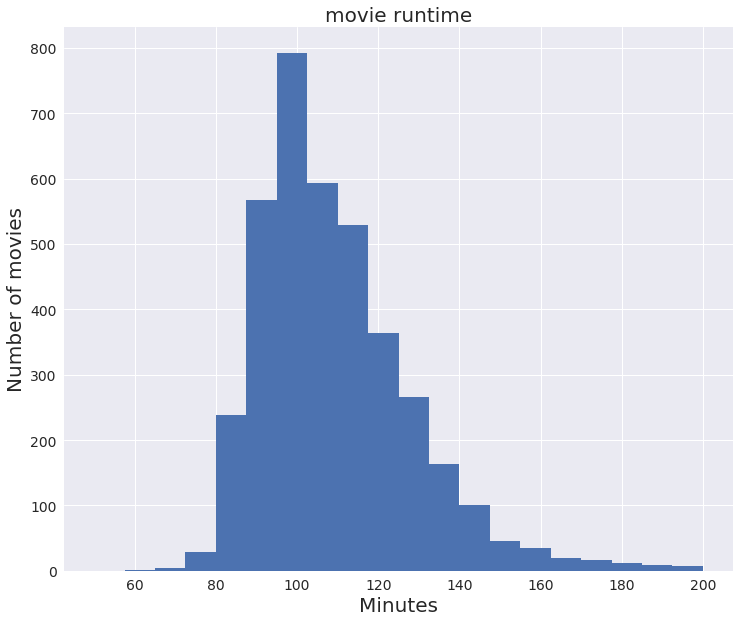

In [121]:
plt.hist(df['runtime'],range=(50,200), bins=20)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('movie runtime', fontsize=20)
plt.xlabel('Minutes', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.show

as we show most of movies of run time between 80 minutes and 120 minutes and according to classification of runninf time of movies this is fine

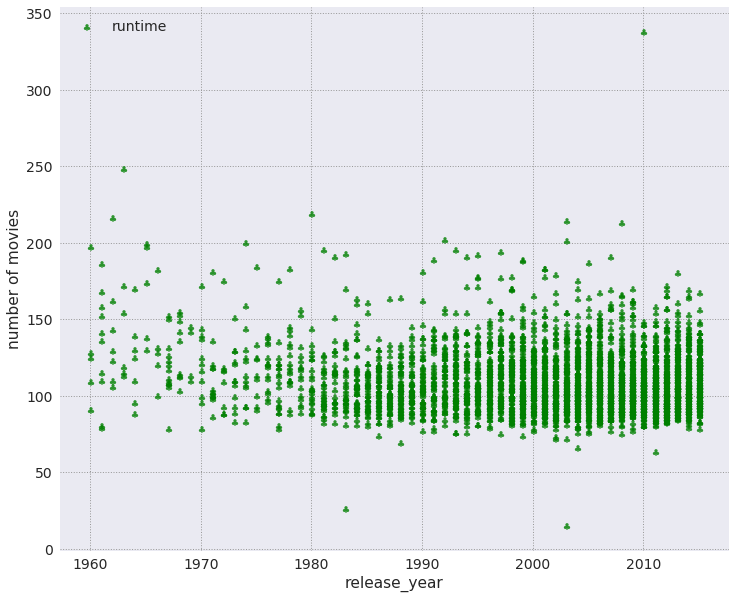

In [122]:
plt.scatter(df.release_year, df.runtime, c="g", alpha=0.8, marker=r'$\clubsuit$',label="runtime")
plt.xlabel("release_year")
plt.ylabel("number of movies")
plt.legend(loc='upper left')
plt.show()

>for the movies in our dataset the run time for most of the movies didn't change with the differance of years and the mean of run time was about 102 minutes for most of the movies in the dataset

# Which year has the largest production number of movies and which mounth

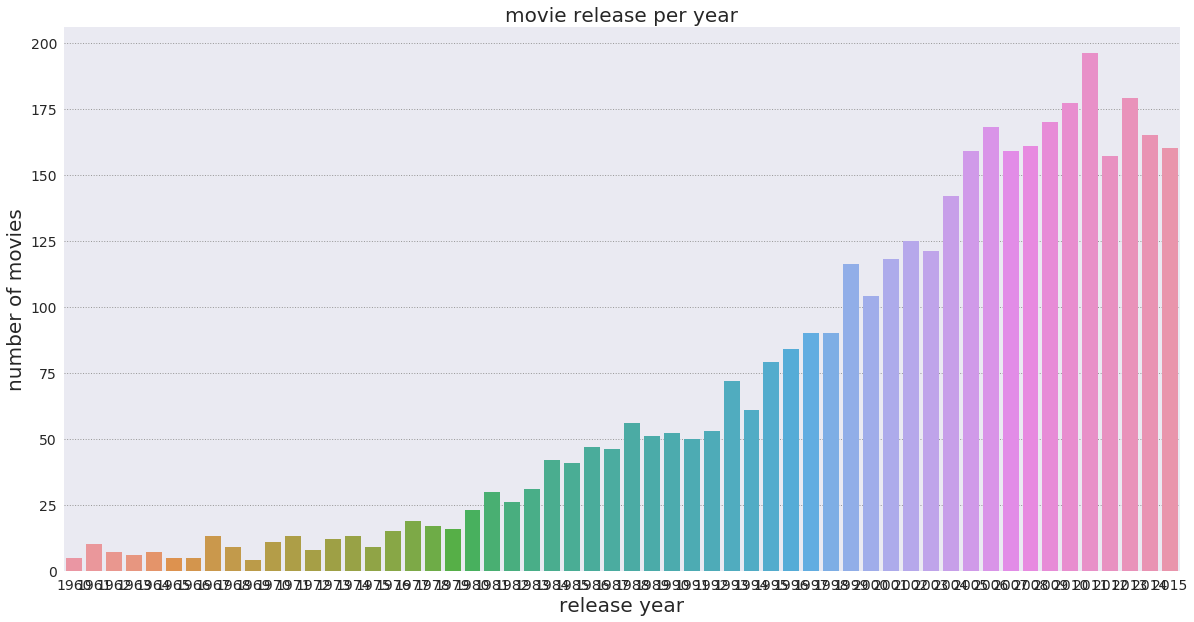

In [123]:
plt.figure(figsize=(20, 10))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(df['release_year'])
plt.title('movie release per year', fontsize=20)
plt.xlabel('release year', fontsize=20)
plt.ylabel('number of movies', fontsize=20)
plt.show()

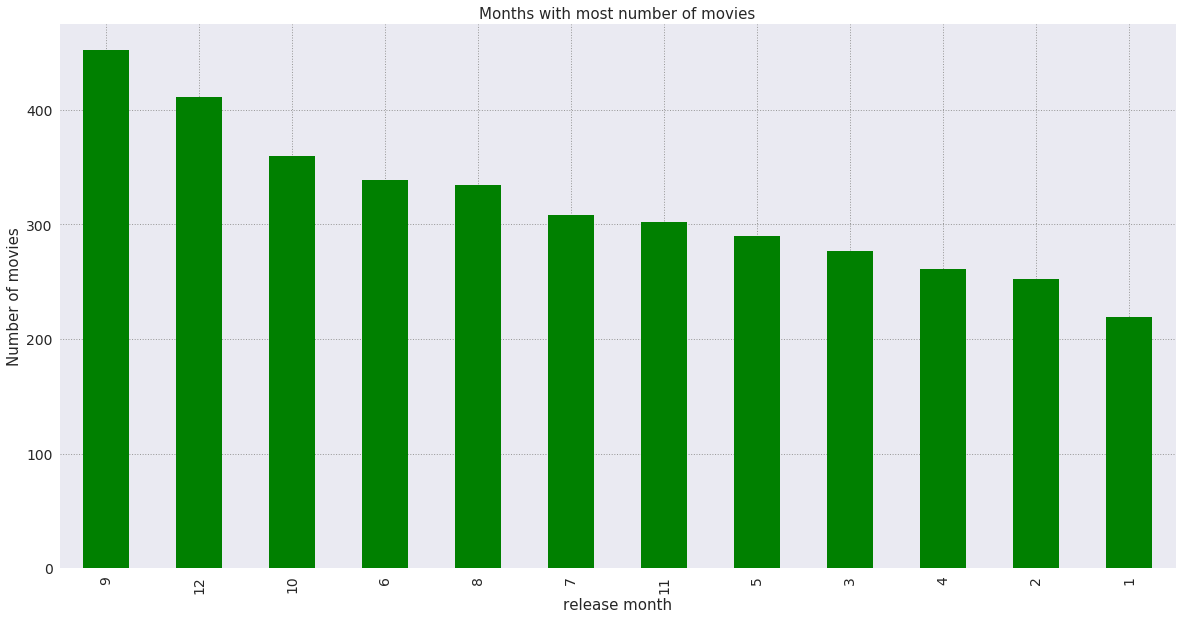

In [124]:
plt.figure(figsize=(20, 10))
df['release_date'].dt.month.value_counts().plot.bar(color='green')
plt.title('Months with most number of movies', fontsize=15)
plt.xlabel('release month', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)
plt.show()

>from the Data above we found that number of movies produced in the racent days more than in the first years of the dataset with asignificance increase in the production especially in the last ten years of the data set
> for months we found that the release of films increase in september and october above the other months and the least month for the release of movies was february and the rest of the months are the same

# Which movie achieve the highiest profit and which one was the lowest one

In [125]:
df.original_title[df['profit']==df['profit'].max()]

1386    Avatar
Name: original_title, dtype: object

In [126]:
df.original_title[df['profit']==df['profit'].min()]

2244    The Warrior's Way
Name: original_title, dtype: object

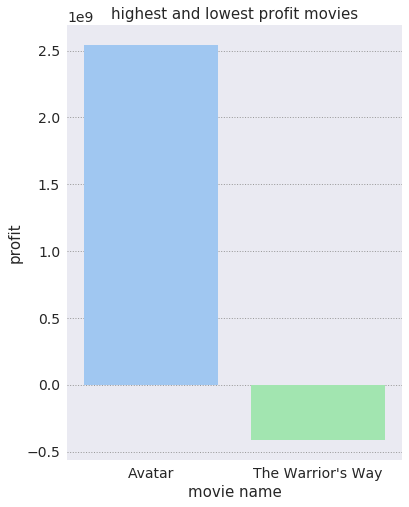

In [127]:
plt.figure(figsize=(6, 8))
dd=df[(df.profit==df['profit'].max())|(df.profit==df['profit'].min())]
sns.barplot(dd['original_title'], dd['profit'], palette="pastel")
plt.title('highest and lowest profit movies', fontsize=15)
plt.xlabel('movie name', fontsize=15)
plt.ylabel('profit', fontsize=15)
plt.show()

> **we obseve that Avatar achieving the maximum profit through the movie list and the least film accordind to profit was The Warrior's Way**

# The top 10 movies according to different variables

# What are the top 10 movies acording to the profit

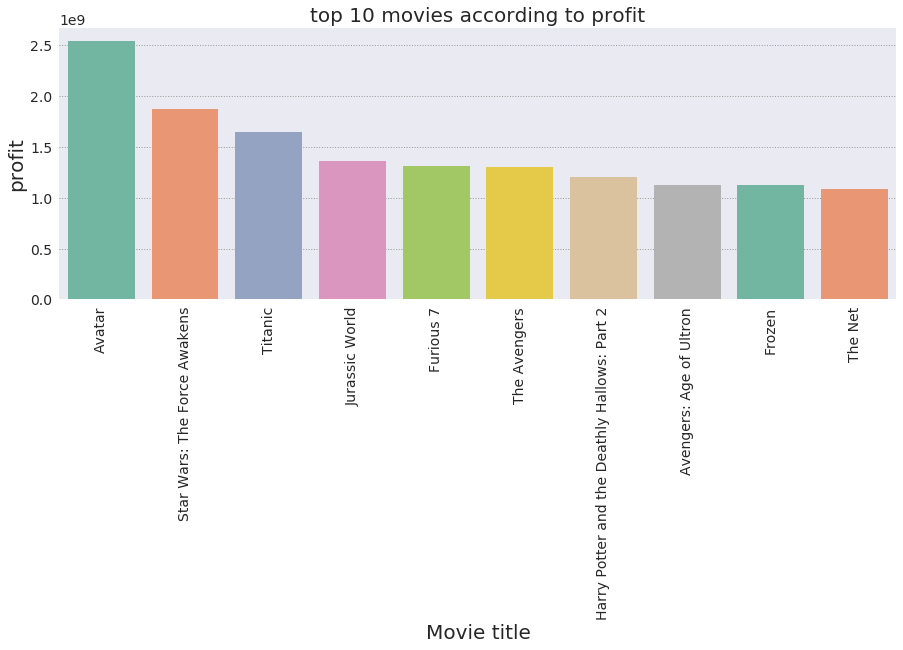

In [128]:
plt.figure(figsize=(15, 5))
ds=df[['original_title', 'profit']].sort_values('profit', ascending = False).head(10)
sns.barplot(x='original_title', y='profit', data =ds, palette="Set2")
plt.title('top 10 movies according to profit', fontsize=20)
plt.xlabel('Movie title', fontsize=20)
plt.ylabel('profit', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

# What are the top 10 movies according to the popularity

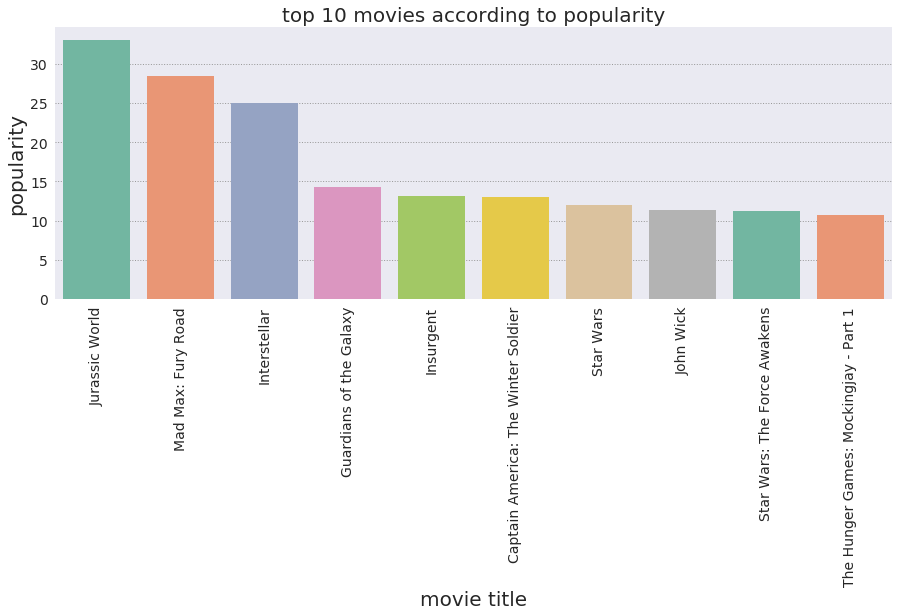

In [129]:
plt.figure(figsize=(15, 5))
ds=df[['original_title', 'popularity']].sort_values('popularity', ascending = False).head(10)
sns.barplot(x='original_title', y='popularity', data =ds, palette="Set2")
plt.title('top 10 movies according to popularity', fontsize=20)
plt.xlabel('movie title', fontsize=20)
plt.ylabel('popularity', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

# What are the top 10 movies according to vote count

In [130]:
df.original_title[df['vote_count']==df['vote_count'].max()]

1919    Inception
Name: original_title, dtype: object

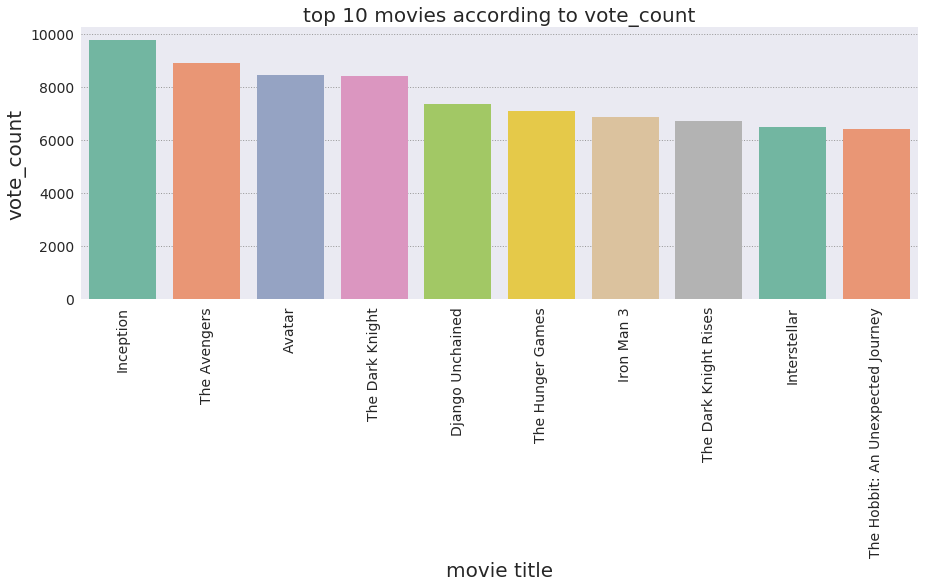

In [131]:
plt.figure(figsize=(15, 5))
ds=df[['original_title', 'vote_count']].sort_values('vote_count', ascending = False).head(10)
sns.barplot(x='original_title', y='vote_count', data =ds, palette="Set2")
plt.title('top 10 movies according to vote_count', fontsize=20)
plt.xlabel('movie title', fontsize=20)
plt.ylabel('vote_count', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

from the above chart we found that the top 10 movies list changed with chanding of the variables 
we found that Inception is the first choice according to vote count
jurrasic world is the most popular one , while Avatar is the most profit achieving film in the list

# Top 10 Movies based on their average vote

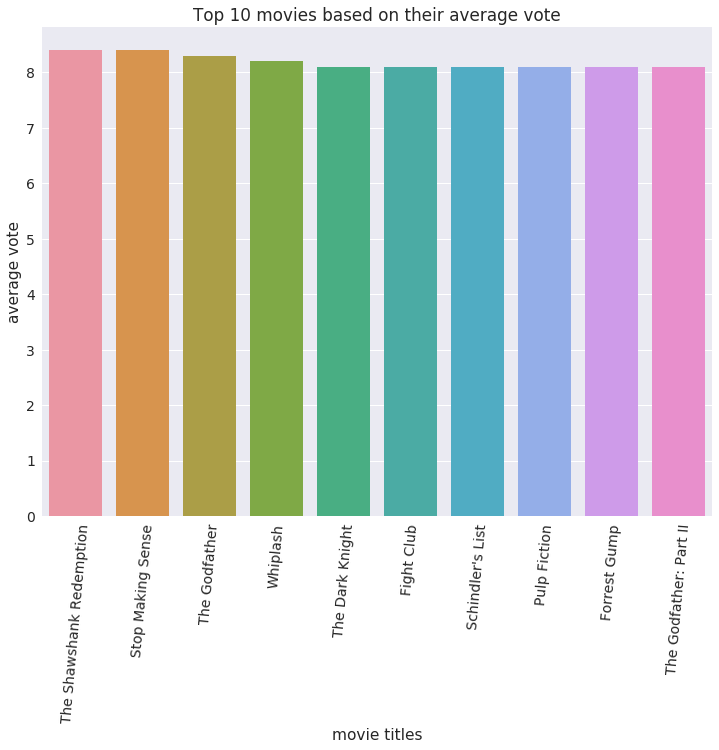

In [132]:
movies_and_votes= df[['original_title','vote_average']]
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
ax = sns.barplot(
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).original_title, 
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).vote_average)
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='average vote', title = 'Top 10 movies based on their average vote')
plt.show()

# What are the top 10 years according to profit

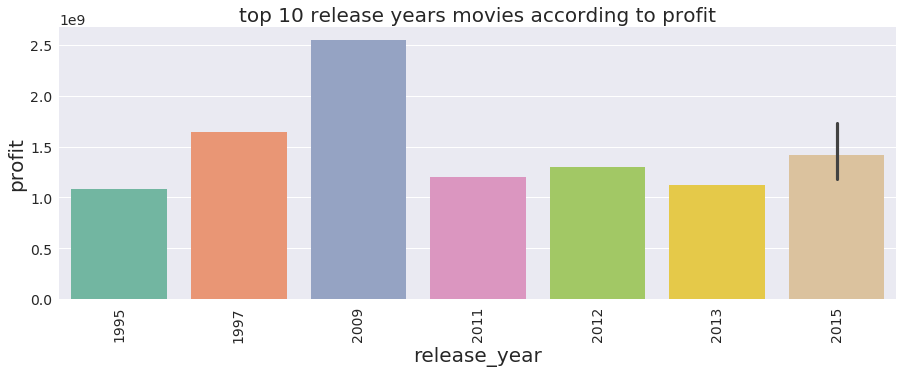

In [133]:
plt.figure(figsize=(15, 5))
ds=df[['release_year', 'profit']].sort_values('profit', ascending = False).head(10)
sns.barplot(x='release_year', y='profit', data =ds, palette="Set2")
plt.title('top 10 release years movies according to profit', fontsize=20)
plt.xlabel('release_year', fontsize=20)
plt.ylabel('profit', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

we found year 2009 was the the greatest year in pure incomes for movies, it was the year of release of Avatar movie

# what is the popular movie Genres

In [134]:
Data_genres=df['genres'].str.get_dummies(sep='|')

In [135]:
Data_genres_1=Data_genres.sum().reset_index()

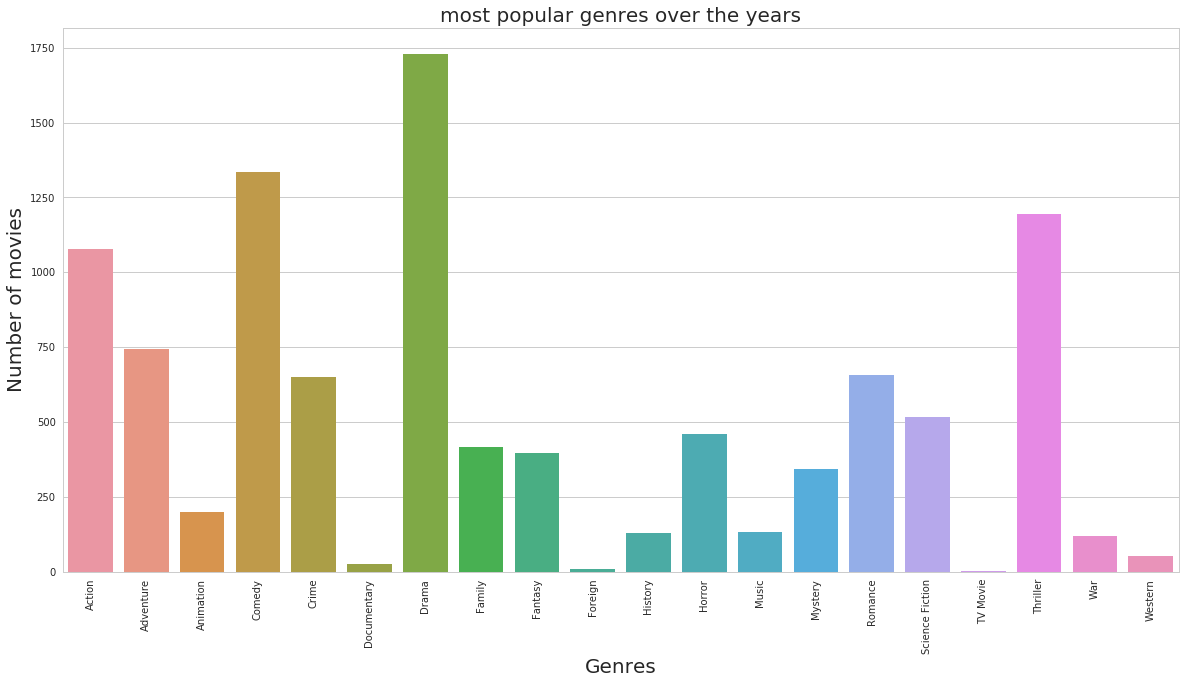

In [136]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.barplot(x=Data_genres.columns,y=Data_genres.sum(), data=Data_genres_1)
plt.title('most popular genres over the years', fontsize=20)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.xticks(rotation = 90)
plt.show()  

of thelist of movie Genres we found the most poplar class is drama movies followed by comedy and thriller movies and the least popular class is western movies

# What is the top 10 production companies

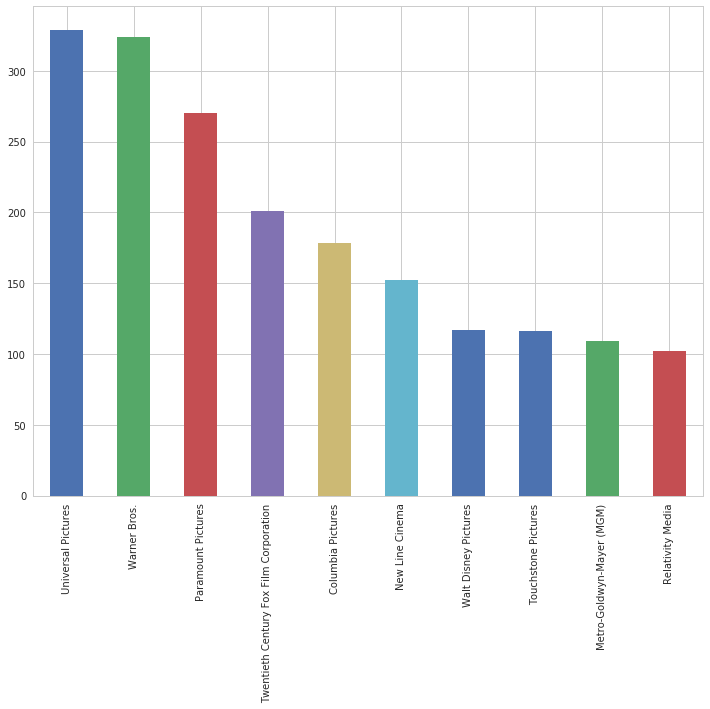

In [137]:
data_production = df['production_companies'].str.get_dummies(sep='|')
data_production_company=data_production[data_production.columns].apply(lambda x: sum(x.values))
data_production_company.sort_values(0,ascending=False).head(10).plot.bar()
plt.show()

universal pictures produce more than 300 of the movies in our list and warnerBros come after that 

# Who is the most popular director?

<function matplotlib.pyplot.show(*args, **kw)>

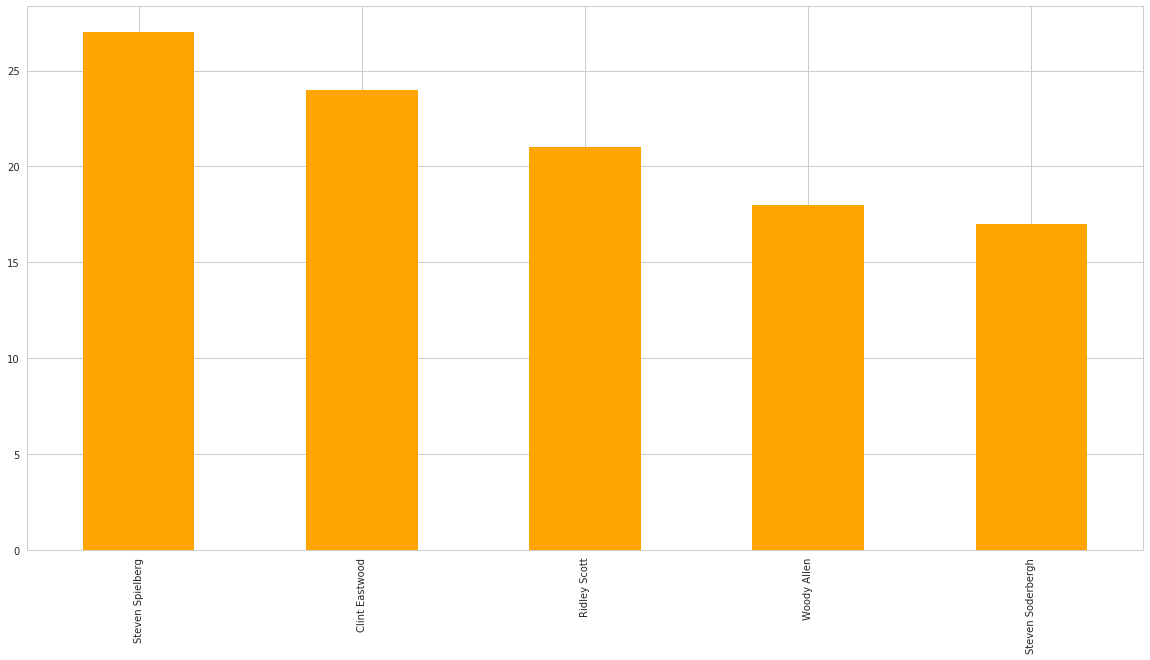

In [138]:
df['director'].value_counts().head().plot.bar(figsize=(20, 10), color ='orange')
plt.show

In [139]:
df['director'][df['director']=='Woody Allen'].count()

18

we found that Woody Allen is the most popular director in our data set he direct about 45 movies from the movies in the list

<a id='conclusions'></a>
## Conclusions

> in our investigation of the movies dataset we start by examining the average runtime of the movies and if it changed through the years or not, we notice that the average runtime for most of movies about 102 minutes.

> then we take a look on the release of movies per years and per months through the dataset we found that releasing increase in the racent years more than before as the movie production is one of the promising industries sectors so the releasing of movies increase positively and found in our data set year 2014 is the year of the most released movies and for month we found september, october and december on the head of the list. 

> when we come to the pure income of the movies (profit) we found Avatar movie achieving the greatest rofit and the Warrior way movie achienving the least pure income , we compare movies according different variables to make a list of the best 10 movies but we found that the list change from variable to another for example avatar come on top 10 profit achieving movies, gurrasic world is the most popular movie and for vote_count the surprise was the inception movie on the top of the list.

> we investigate which years achieving the best profit we found 2009 of course it is the year in which Avatar were released.
> **movies Genres **from our investigate we observe that the most favourite genre is Drama movies followed by comedy.
> we found that universal, warnerBross companies have alarge percentage of the movie production 
and  Woody Allen was the popular director as he direct 45 movies from the list

>**limitations** 
some of the columns and the row in data set come with NaN values which i think its not the better thing to take the means of the cells beside them to fill in them or to delete theses rows as that will change the result of our data.
we didn't find any data about if the movies win a prizes or not in data set this can be helpful in making correlation between the prize winning and the pure income of the movies and if the popularity or voting affect prize winning or not .
also i think data set made for a wide range of time which i think not approperiate for the comparison as the Awareness of viewers and their public taste differ from year to year. so if the database for only last 10 years i think it will be more interesting as many conditions differ throudgh the last decades in the production process.



In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255